# Compare water phantom

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import scipy.optimize as optimize
from matplotlib.colors import LogNorm

## Useful functions

In [2]:
def read_sqmatrix(filename, n, t):
    with open(filename, 'rb') as infile:
        data = np.fromfile(infile, dtype=t)
    return data.reshape(n, n, order='F')

## Global constants

In [3]:
n = 6421
ct = 1
cbct = 6

# Read data

In [4]:
ct = read_sqmatrix('adaptation_x10_y20_z30/influence_MC_CT_water.dat', n, np.float32)
cbct = read_sqmatrix('adaptation_x10_y20_z30/influence_MC_CBCT_water.dat', n, np.float32)
# ct = ct.astype(np.float32)
# cbct = cbct.astype(np.float32)

In [5]:
ct[0,0:10]

array([  1.15287450e+07,   1.16339425e+06,   9.84425938e+04,
         1.01622984e+05,   9.42484375e+03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00], dtype=float32)

In [6]:
ct.max()

9.2702656e+08

The indexing standard is:

\begin{equation*}
I_{ij} =  \left(\begin{matrix}
\ldots  & probe_j & \ldots \\
spot_i &  I_{11} & I_{12} \\
\ldots &  I_{21} & I_{22}
\end{matrix}\right)
\end{equation*}

- $I_{i} = \sum\limits_{j=0}^{n} I_{ij}$: Summing all the columns of row $i$ will give the total influence done by spot $i$ on all the spots $0 \rightarrow n$ (including itself)
- $I_{J} = \sum\limits_{i=0}^{n} I_{ij}$: Summing all the rows of column $j$ will give the total influence expecienced by spot $j$ from all the spots $0 \rightarrow n$ (including itself)

In numpy, axis 0 are columns, axis 1 are rows.

# Plot matrices

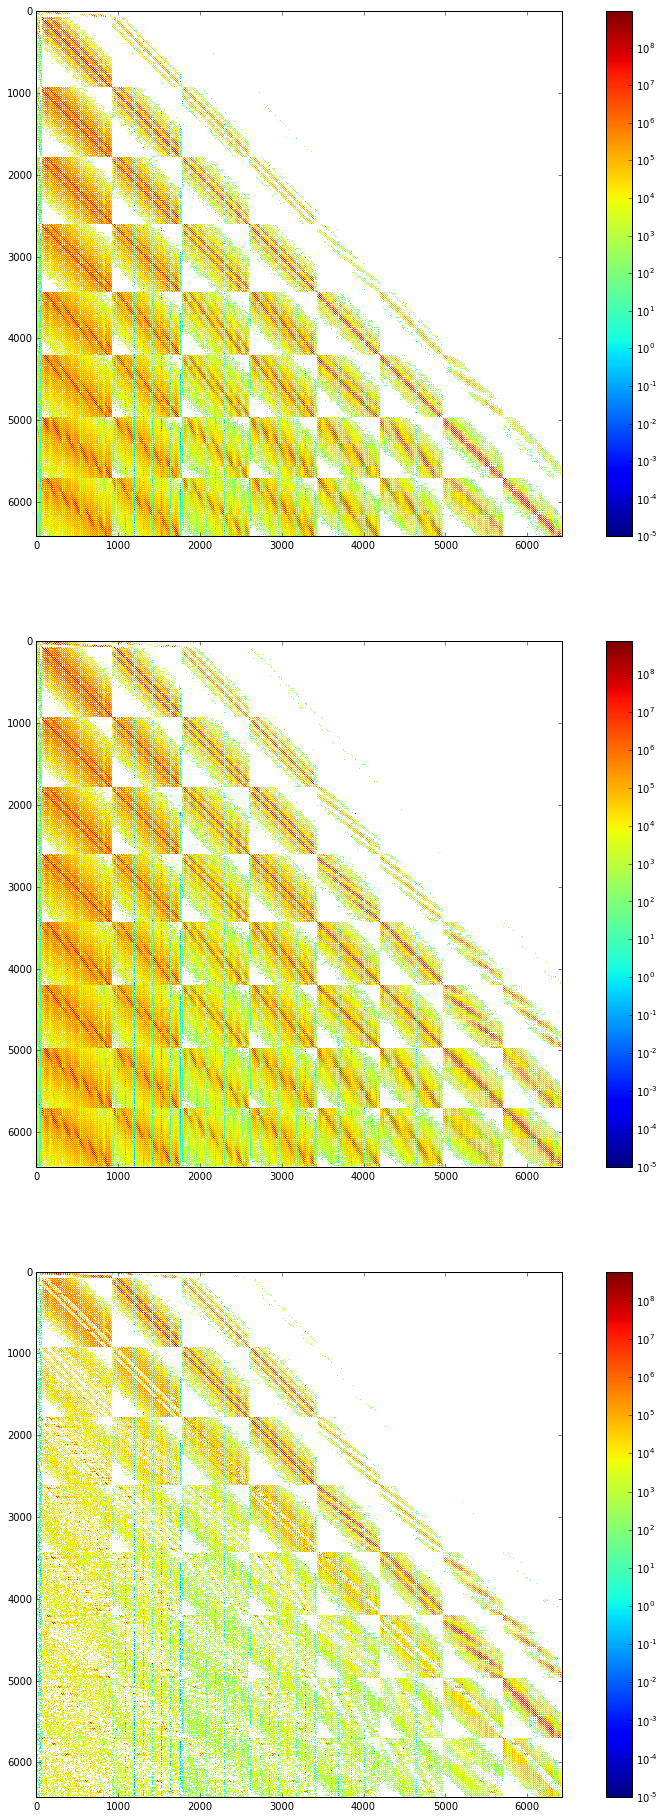

In [13]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 32)
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
norm = LogNorm(0.00001, ct.max(), clip='True')
im = ax.imshow(ct, norm=norm, interpolation='None')
fig.colorbar(im, ax=ax)
ax = fig.add_subplot(3,1,2)
norm = LogNorm(0.00001, cbct.max(), clip='True')
im = ax.imshow(cbct, norm=norm, interpolation='None')
fig.colorbar(im, ax=ax)
ax = fig.add_subplot(3,1,3)
norm = LogNorm(0.00001, np.max([cbct-ct]), clip='True')
im = ax.imshow(cbct-ct, norm=norm, interpolation='None')
fig.colorbar(im, ax=ax)

# Accumulate influence on each spot

In [22]:
%matplotlib inline

a = [[i*5+j for j in range(5)] for i in range(5)]
print(a)
print(a[0,0:4])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(a, interpolation='None')

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19], [20, 21, 22, 23, 24]]


TypeError: list indices must be integers, not tuple

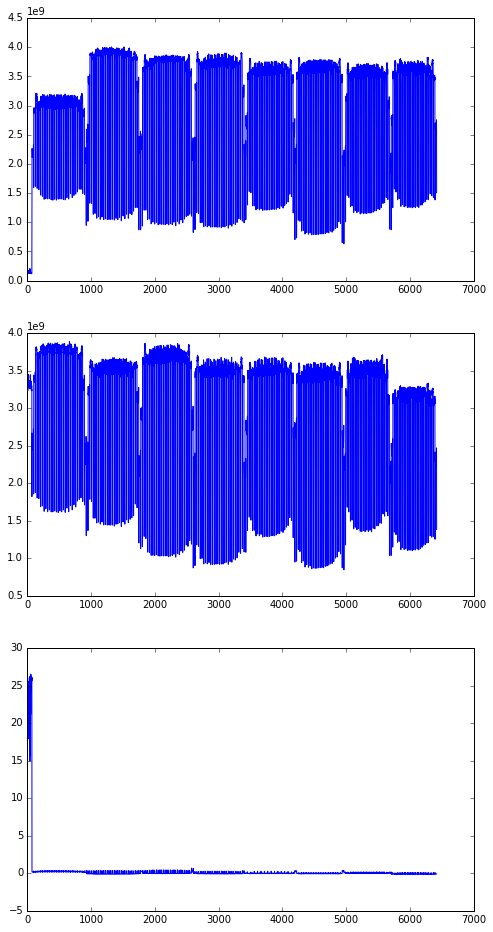

In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 16)
fig = plt.figure()
ax = fig.add_subplot(3,1,1)
ax.plot(ct.sum(1))
ax = fig.add_subplot(3,1,2)
ax.plot(cbct.sum(1))
ax = fig.add_subplot(3,1,3)
ax.plot((cbct.sum(1)-ct.sum(1))/ct.sum(1))